In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import date
import dateutil.parser

In [44]:
style.use('fivethirtyeight')
from dateutil.relativedelta import relativedelta
from datetime import date
import dateutil.parser

In [45]:
import numpy as np
import pandas as pd

In [8]:
import datetime as dt, timedelta

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import desc
from sqlalchemy import create_engine, func, inspect 
from sqlalchemy.sql import label

In [10]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [15]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
print(f"measurement table schema ")
for column in columns:
    print(column["name"], column["type"])

# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('station')
print(f"station table schema ")
for column in columns:
    print(column["name"], column["type"])

measurement table schema 
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
station table schema 
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

2017-08-23
2016-08-23 00:00:00


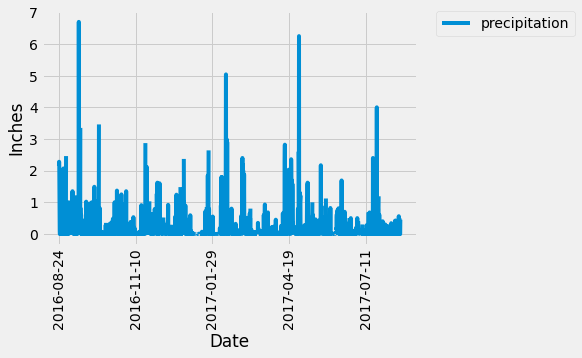

In [16]:
from matplotlib import docstring
from matplotlib.backend_bases import FigureCanvasBase
from matplotlib.figure import Figure, figaspect
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams, rcParamsDefault, get_backend, rcParamsOrig
from matplotlib import axes, cbook

# Design a query to retrieve the last 12 months of precipitation data and plot the results

i =-12
max_date = session.query(Measurements).order_by(desc('date')).first()
print(max_date.date)

d = dt.datetime.strptime(max_date.date, "%Y-%m-%d")
month_12 = d - dateutil.relativedelta.relativedelta(months=12)
print(month_12)


# print(now + dateutil.relativedelta.relativedelta(months=-1))

# six_months_ago = max_date -  datetime.timedelta(weeks = 24)
# six_months = max_date - relativedelta(months=+6)
# six_months

# othermonth = str(max_date.date) + relativedelta(months=i)
# print(othermonth)
dated = []
precip = []
results = session.query(Measurements).filter(Measurements.date > month_12).all()
for measure in results:
    dated.append(measure.date)
#     print(dated)
    precip.append(measure.prcp)
#     print(precip)


data=np.array([dated,precip])

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df =pd.DataFrame({"dates":dated,"precipitation":precip}, index=dated)
# print dataframe. 
df.head()

# Sort the dataframe by date
df = df.sort_values(by=['dates'])
# Use Pandas Plotting with Matplotlib to plot the data
# df.plot(rot=90)


df.plot(rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(df.describe())

       precipitation
count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


In [60]:
# Design a query to show how many stations are available in this dataset?
# station_total = session.query(Station).filter('date')).count()
tot_station = engine.execute('SELECT * FROM Station').fetchall()
len(tot_station)
#or
engine.execute('SELECT count(*) FROM Station').fetchall()
#or
session.query(func.count(Stations.id)).scalar()

9

In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute('SELECT name FROM Station').fetchall()

#all stations
top_station = session.query(Measurements.station, Measurements.id, label('station_count',func.count(Measurements.id))).\
    group_by(Measurements.station).order_by(desc(func.count(Measurements.id))).all()
print(top_station)

#top station
top_station_1 = session.query(Measurements.station, Measurements.id, label('station_count',func.count(Measurements.id))).\
    group_by(Measurements.station).order_by(desc(func.count(Measurements.id))).first()

#top_station over last year
top_station_year = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date > month_12).filter(Measurements.station==top_station_1[0]).all()

top_station_1

[('USC00519281', 12188, 2772), ('USC00519397', 1, 2724), ('USC00513117', 2725, 2709), ('USC00519523', 9519, 2669), ('USC00516128', 16939, 2612), ('USC00514830', 5434, 2202), ('USC00511918', 14960, 1979), ('USC00517948', 7636, 1372), ('USC00518838', 9008, 511)]


('USC00519281', 12188, 2772)

Low temperature  SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.id = ?
 lowest temperature e.g 1 53.0
 highest temperature 87.0
 Top station WAIKIKI 717.2, HI US, station id is 1
2016-08-23 00:00:00


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 1 Patch objects>)

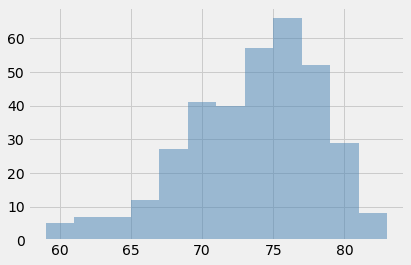

In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# top_station_id = top_station[1]
# top_station_id

low_temp = session.query(Measurements).\
    filter(Measurements.id == top_station[1])
print(f"Low temperature  {low_temp}")

# lowest_temp = []
# for tempt in low_temp:
#     if type(tempt.tobs) == int:
#         lowest_temp.append(tempt.tobs)
# min(lowest_temp)


lowest = session.query(Measurements.id, Measurements.tobs).\
    order_by(Measurements.tobs.asc()).first()
print(f" lowest temperature e.g 1 {lowest.tobs}")
#or
results = session.query(Measurements).filter(Measurements.date > month_12).all()

# min_temp = (session.query(Measurements, func.min(Measurements.tobs).filter_by(Measurements.id == 12188))
#     .group_by(Measurements.tobs)
#      ).all()
# print(f" Lowest temperature e.g 2 {min_temp}")



# highest temperature recorded, and average temperature of the most active station?
highest = session.query(Measurements.id, Measurements.tobs).\
    order_by(Measurements.tobs.desc()).first()
print(f" highest temperature {highest.tobs}")

station_average = (session.query(Stations.name, func.count(Stations.id).label("# people"))
    .group_by(Stations.name)
     ).all()


# Choose the station with the highest number of temperature observations.
top_station = session.query(Stations.name, label('station_count',func.count(Stations.id))).\
    group_by(Stations.id).first()

print(f" Top station {top_station.name}, station id is {top_station.station_count}")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
print(month_12)



# measure_count = (session.query(Measurements.station, func.count(Measurements.tobs).label("# people"))
#     .group_by(Measurements.tobs)
#      ).all() 
# print(f"measure count {measure_count}" )

dated = []
temps = []
for measures in top_station_year:
    dated.append(measures.date)
    temps.append(measures.tobs)

    data=np.array([dated,temps])

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df =pd.DataFrame({"dates":dated,"tobs":temps})
# print dataframe. 
df.head()
#print(df)

# x_value = df.loc['dates']
# y_value = df.iloc['tobs']

x_value = list(dated)
y_value = list(temps)



# import matplotlib.pyplot as plt
# import numpy as np
# %matplotlib inline
# ax = df.hist(column='x_value', by='y_value', bins=12, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

# ax

plt.hist(df['tobs'], bins=12, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none',# ax = df.hist(column='x_value', by='y_value', bins=12, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)
)

# results = db.query(Measurements.station, label('members', func.count(Measurements.id)).group_by(Measurements.id).all()

## Bonus Challenge Assignment

In [63]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2016-02-28', '2016-03-05'))

[(62.0, 69.88636363636364, 80.0)]


In [64]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    result_temps = session.query(label('TMIN',func.min(Measurements.tobs)), label('TAVE', func.avg(Measurements.tobs)),label('TMAX',func.max(Measurements.tobs))).\
        filter(Measurements.date > month_12).filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    
    for result in result_temps:
        print(list(result_temps))
        
#     listings = []
#     for i in result_temps:
#         listings.append(i)
#     print(listings[])
    
    return result_temps
    # function usage example

print(calc_temps('2016-12-20', '2017-01-05'))
    

[(62.0, 71.0754716981132, 78.0)]
[(62.0, 71.0754716981132, 78.0)]


In [65]:
import datetime as dt

prev_year_start = dt.date(2018,1,1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018,1,7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"),prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

[(62.0, 68.36585365853658, 74.0)]
62.0 68.36585365853658 74.0


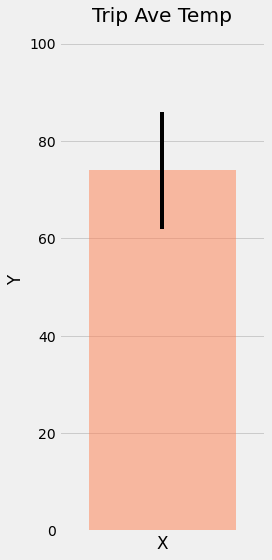

In [66]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos=1
yerr = tmax - tmin

bar = ax.bar(xpos, tmax, yerr=yerr , alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos),xticklabels="a", title="Trip Ave Temp", ylabel="Y", xlabel="X")
ax.margins(.2, .2)
fig.tight_layout()
# fig.show()

In [67]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2013-02-28'
end_date = '2018-03-05'

prpt_station = session.query(label('station_name',Stations.name), \
                             label('station_lon', Stations.longitude), \
                             label('station_lat', Stations.latitude), \
                             label('station_elev', Stations.elevation), \
                             label('count_prcp',func.count(Measurements.prcp))).\
        filter(Measurements.date > month_12).filter(Measurements.date >= start_date).\
                             filter(Measurements.date <= end_date).\
        group_by(Stations.name).order_by(desc(func.count(Measurements.prcp))).all()

prpt_station

[('WAIMANALO EXPERIMENTAL FARM, HI US', -157.71139, 21.33556, 19.5, 2015),
 ('WAIKIKI 717.2, HI US', -157.8168, 21.2716, 3.0, 2015),
 ('WAIHEE 837.5, HI US', -157.84888999999998, 21.45167, 32.9, 2015),
 ('UPPER WAHIAWA 874.3, HI US', -158.0111, 21.4992, 306.6, 2015),
 ('PEARL CITY, HI US', -157.9751, 21.3934, 11.9, 2015),
 ('MANOA LYON ARBO 785.2, HI US', -157.8025, 21.3331, 152.4, 2015),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', -157.8374, 21.5213, 7.0, 2015),
 ('KANEOHE 838.1, HI US', -157.8015, 21.4234, 14.6, 2015),
 ('HONOLULU OBSERVATORY 702.2, HI US', -157.9992, 21.3152, 0.9, 2015)]

In [68]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [69]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

trip_start = '2018-01-01'
trip_end = '2018-01-07'

trip_dates = pd.date_range(trip_start,trip_end, freq='D')

#strip off year
trip_month_day = trip_dates.strftime('%m-%d')
#loop through list

normals=[]

for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [70]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Creates pandas DataFrame. 
import datetime as dt, timedelta

df = pd.DataFrame(normals, columns=['tmin','tave','tmax'])
df['date'] = trip_dates
df.set_index(['date'], inplace=True)
df.head()

,tmin,tave,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


Text(0.5, -2.399355652982109, 'Temperature')

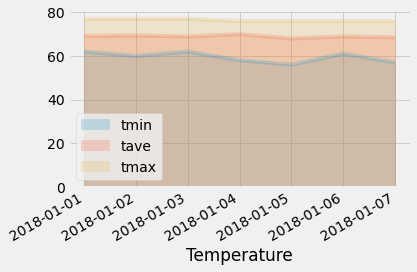

In [71]:
# Plot the daily normals as an area plot with `stacked=False`

df.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
plt.tight_layout()
plt.xlabel("Date")
plt.xlabel("Temperature")
